In [1]:
import subprocess
import os
import requests
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import folium

folder_path_repo_root = subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('utf-8').strip()
file_path_random_kuala_lumpur_locations = os.path.join(folder_path_repo_root, 'experiment', 'notebooks', 'malaysia_random_points.csv')

import sys
sys.path.append(folder_path_repo_root)

In [2]:
# Pickup point (center)
pickup_point = (3.107824318483157, 101.62917384709634)  # Warehouse

delivery_points = list(
    pd.read_csv(file_path_random_kuala_lumpur_locations)[['latitude', 'longitude']]
        .itertuples(index=False, name=None)
)

# Combine pickup and delivery points
all_points = [pickup_point] + delivery_points
all_points[:3]

[(3.107824318483157, 101.62917384709634),
 (3.2607447929786213, 101.6122155014524),
 (3.2627034145967366, 101.6436939904406)]

In [4]:
from experiment.notebooks.utils import plot_point_on_map, save_map_to_image

m = folium.Map(location=[pickup_point[0], pickup_point[1]], zoom_start=13)
plot_point_on_map(
    pickup_point, m,
    f"Warehouse -- ({pickup_point[0]}, {pickup_point[1]})",
    'red',
)
for point in delivery_points:
    plot_point_on_map(
      point, m,
      f"({point[0]}, {point[1]}",
      'blue',
    )

m

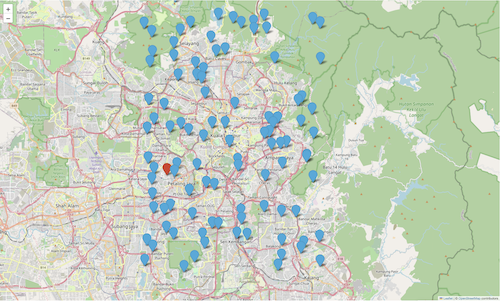

In [7]:
from PIL import Image
Image.open('./0-pickup-and-dropoffs.png')